In [2]:
#Function and Data Dependancies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

DATA_DIR = Path.home()/Path('shared/climate-data')

co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file, na_values=-99.99).dropna()
data.head()

#Data Dependancy from Q2)

def detrend(f):
    detrended_xarr = f.loc[:, ["month", "c02"]]
    # BEGIN SOLUTION
    detrended_xarr["c02"] = f["c02"] - f["c02"].apply("mean")
    # END SOLUTION
    return detrended_xarr

dy = data.groupby('year')
c02anomaly = dy.apply(detrend)
display(c02anomaly)
monthly_anomaly = c02anomaly.groupby('month').mean()[['c02']]
monthly_anomaly

/tmp/ipykernel_3652/3327670801.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")
/tmp/ipykernel_3652/3327670801.py:32: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  c02anomaly = dy.apply(detrend)


,month,c02
2,3,0.3675
3,4,2.1175
4,5,2.1775
6,7,0.5275
7,8,-0.4025
...,...,...
756,1,-2.0180
757,2,-0.7180
758,3,-0.0480
759,4,1.0520


,c02
month,
1,-0.683835
2,0.076121
3,0.874238
4,2.240270
5,2.864155
6,2.299297
7,0.792919
8,-1.195018
9,-2.851367


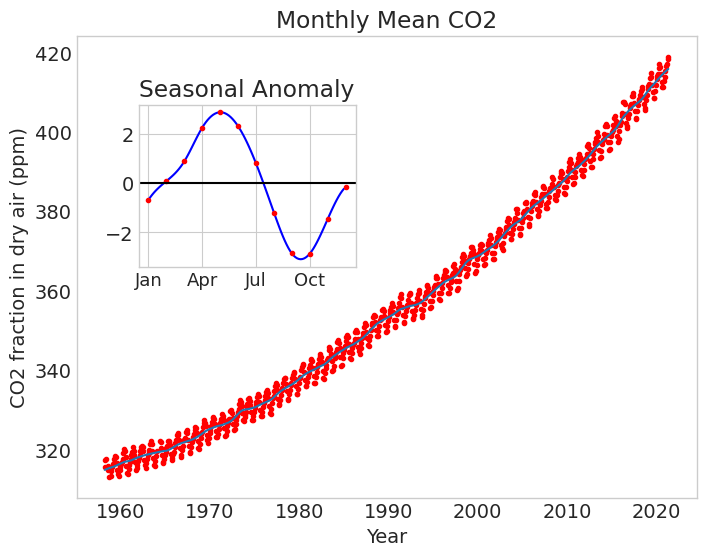

In [3]:
from scipy.interpolate import CubicSpline


# plot
fig, ax = plt.subplots()

ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)

axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
#x = monthly_anomaly.reset_index().index
x = np.arange(1, 13, 1)
y = monthly_anomaly.c02
cs = CubicSpline(x, y)
xs = np.arange(1, 12, .1)
axin1.plot(xs, cs(xs), "b")
axin1.plot(monthly_anomaly.c02, "r.")
axin1.set_xticks([1, 4,7,10])
axin1.axhline(0, ls='-', color = "black")
axin1.set_xticklabels(["Jan", "Apr", "Jul","Oct"], size = 13)
axin1.set_title("Seasonal Anomaly");
